## FLAML for hp optimisation and model selection
We use FLAML twice, first to find the best component model for each estimator, and then to optimise the estimators themselves and choose the best estimator. Here we show how it's done

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
import warnings
# warnings.filterwarnings('ignore') # suppress sklearn deprecation warnings for now.. 

# the below checks for whether we run dowhy and auto-causality from source
root_path = root_path = os.path.realpath('../..')
try: 
    import auto_causality
except ModuleNotFoundError:
    sys.path.append(os.path.join(root_path, "auto-causality"))
    
try:
    import dowhy
except ModuleNotFoundError:
    sys.path.append(os.path.join(root_path, "dowhy"))

In [2]:
from auto_causality import AutoCausality
from auto_causality.datasets import synth_ihdp, preprocess_dataset
from auto_causality.scoring import ate

### Model fitting & scoring
Here we fit a (selection of) model(s) to the data and score them with the ERUPT metric on held-out data

In [3]:
# import dataset
data_df = synth_ihdp()
data_df, features_X, features_W, targets, treatment = preprocess_dataset(data_df)
outcome = targets[0]


# init autocausality object with chosen metric to optimise
ac = AutoCausality(
    time_budget=1800, 
    estimator_list=[
            "Dummy",
            "SparseLinearDML",
            "ForestDRLearner",
            "TransformedOutcome",
            "CausalForestDML",
            ".LinearDML",
            "DomainAdaptationLearner",
            "SLearner",
            "XLearner",
            "TLearner",
            # "Ortho",
        ],#"auto", 
    metric="norm_erupt", 
    verbose=3,
    components_verbose=2,
    components_time_budget=30,
)

# run autocausality
myresults = ac.fit(data_df, treatment, outcome, features_W, features_X)

# return best estimator
print(f"Best estimator: {ac.best_estimator}")
# config of best estimator:
print(f"best config: {ac.best_config}")
# best score:
print(f"best score: {ac.best_score}")


[flaml.automl: 04-01 14:18:23] {2145} WARNING - Time taken to find the best model is 72% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
[flaml.automl: 04-01 14:18:53] {2145} WARNING - Time taken to find the best model is 96% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
[flaml.automl: 04-01 14:19:23] {2145} WARNING - Time taken to find the best model is 75% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
[flaml.tune.tune: 04-01 14:19:53] {326} WARNING - Using CFO for search. To use BlendSearch, run: pip install flaml[blendsearch]
[flaml.tune.tune: 04-01 14:19:53] {447} INFO - trial 1 config: {'estimator': {'estimator_name': 'backdoor.auto_causality.models.Dummy'}}


Initial configs: [{'estimator': {'estimator_name': 'backdoor.auto_causality.models.Dummy'}}, {'estimator': {'estimator_name': 'backdoor.econml.dml.SparseLinearDML', 'fit_cate_intercept': True, 'n_alphas': 100, 'n_alphas_cov': 10, 'tol': 0.0001, 'max_iter': 10000, 'mc_agg': 'mean'}}, {'estimator': {'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 1e-06, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'min_balancedness_tol': 0.45, 'honest': True, 'subforest_size': 4}}, {'estimator': {'estimator_name': 'backdoor.auto_causality.models.TransformedOutcome'}}, {'estimator': {'estimator_name': 'backdoor.econml.dml.CausalForestDML', 'drate': True, 'n_estimators': 100, 'criterion': 'mse', 'min_samples_split': 10, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'm

[flaml.tune.tune: 04-01 14:21:01] {108} INFO - result: {'norm_erupt': 2.2256994432663024, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000013739D4F100>, 'estimator_name': 'backdoor.auto_causality.models.Dummy', 'scores': {'train': {'erupt': 6.44176241755484, 'norm_erupt': 2.3965245199066434, 'qini': -0.03302121336979825, 'auc': 0.4961975083375717, 'r_score': -0.010916207125318378, 'ate': 3.9889732688994166, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000013739E002B0>, 'values':      treated  y_factual         p  policy  norm_policy  weights
0        0.0   3.323799  0.201005    True        False    0.000
1        0.0   2.039853  0.201005    True         True    0.000
2        1.0   6.691095  0.201005    True         True    4.975
3        1.0   4.748230  0.201005    True        False    4.975
4        1.0   7.895224  0.201005    True        False    4.975
..       ...        ...       ...     ...          ...      ...
592   

{'estimator_name': 'backdoor.econml.dml.SparseLinearDML', 'fit_cate_intercept': 1, 'n_alphas': 100, 'n_alphas_cov': 10, 'tol': 9.999999999999999e-05, 'max_iter': 10000, 'mc_agg': 'mean'}


[flaml.tune.tune: 04-01 14:23:07] {108} INFO - result: {'norm_erupt': 2.3225728903273613, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000013739E003A0>, 'estimator_name': 'backdoor.econml.dml.SparseLinearDML', 'scores': {'train': {'erupt': 6.44176241755484, 'norm_erupt': 2.7530538709205126, 'qini': 0.07207650902931148, 'auc': 0.5405962328538337, 'r_score': 0.049179740645285075, 'ate': 3.9403175602467204, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000013739F46850>, 'values':      treated  y_factual         p  policy  norm_policy  weights
0        0.0   3.323799  0.201005    True        False    0.000
1        0.0   2.039853  0.201005    True         True    0.000
2        1.0   6.691095  0.201005    True         True    4.975
3        1.0   4.748230  0.201005    True        False    4.975
4        1.0   7.895224  0.201005    True        False    4.975
..       ...        ...       ...     ...          ...      ...
592      

{'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'min_propensity': 1e-06, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'min_balancedness_tol': 0.45, 'honest': 1, 'subforest_size': 4}


[flaml.tune.tune: 04-01 14:24:10] {108} INFO - result: {'norm_erupt': 2.1423032212851725, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000013739F00190>, 'estimator_name': 'backdoor.econml.dr.ForestDRLearner', 'scores': {'train': {'erupt': 6.44176241755484, 'norm_erupt': 2.9489996642692646, 'qini': 0.11384417353250097, 'auc': 0.5804958665469302, 'r_score': 0.07379203893971653, 'ate': 3.886944266563777, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001373CFD51F0>, 'values':      treated  y_factual         p  policy  norm_policy  weights
0        0.0   3.323799  0.201005    True        False    0.000
1        0.0   2.039853  0.201005    True         True    0.000
2        1.0   6.691095  0.201005    True         True    4.975
3        1.0   4.748230  0.201005    True        False    4.975
4        1.0   7.895224  0.201005    True        False    4.975
..       ...        ...       ...     ...          ...      ...
592      1.0

{'estimator_name': 'backdoor.auto_causality.models.TransformedOutcome'}


[flaml.tune.tune: 04-01 14:24:41] {108} INFO - result: {'norm_erupt': 2.763530609977825, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000013739E3C580>, 'estimator_name': 'backdoor.auto_causality.models.TransformedOutcome', 'scores': {'train': {'erupt': 5.864147872600227, 'norm_erupt': 3.3128632377594975, 'qini': 0.48462737483449736, 'auc': 0.5375381783875872, 'r_score': -6.376432295291855, 'ate': 3.9852634814942514, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000013731B51EE0>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.323799  0.201005    True        False  0.000000
1        0.0   2.039853  0.201005    True        False  0.000000
2        1.0   6.691095  0.201005    True         True  4.063485
3        1.0   4.748230  0.201005    True         True  4.063485
4        1.0   7.895224  0.201005    True         True  4.063485
..       ...        ...       ...     ...          ... 

{'estimator_name': 'backdoor.econml.dml.CausalForestDML', 'drate': 1, 'n_estimators': 100, 'criterion': 'mse', 'min_samples_split': 10, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'max_samples': 0.45, 'min_balancedness_tol': 0.45, 'honest': 1, 'fit_intercept': 1, 'subforest_size': 4}


[flaml.tune.tune: 04-01 14:25:42] {108} INFO - result: {'norm_erupt': 2.087501425018739, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000013731596850>, 'estimator_name': 'backdoor.econml.dml.CausalForestDML', 'scores': {'train': {'erupt': 6.44176241755484, 'norm_erupt': 2.8638238256624557, 'qini': 0.10745747717394753, 'auc': 0.5714283864606549, 'r_score': 0.06851486852075195, 'ate': 3.815529054021416, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x0000013739D4DF10>, 'values':      treated  y_factual         p  policy  norm_policy  weights
0        0.0   3.323799  0.201005    True        False    0.000
1        0.0   2.039853  0.201005    True         True    0.000
2        1.0   6.691095  0.201005    True         True    4.975
3        1.0   4.748230  0.201005    True        False    4.975
4        1.0   7.895224  0.201005    True        False    4.975
..       ...        ...       ...     ...          ...      ...
592      1.0

{'estimator_name': 'backdoor.econml.dml.LinearDML', 'fit_cate_intercept': 1, 'mc_agg': 'mean'}


[flaml.tune.tune: 04-01 14:26:42] {108} INFO - result: {'norm_erupt': 2.277281264823112, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x0000013739F00160>, 'estimator_name': 'backdoor.econml.dml.LinearDML', 'scores': {'train': {'erupt': 6.43444776404102, 'norm_erupt': 2.7599850464784845, 'qini': 0.06380580238173693, 'auc': 0.5482473364476135, 'r_score': 0.06274156149103938, 'ate': 3.745874556514202, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001373B249790>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.323799  0.201005    True        False  0.000000
1        0.0   2.039853  0.201005    True         True  0.000000
2        1.0   6.691095  0.201005    True         True  4.964592
3        1.0   4.748230  0.201005    True        False  4.964592
4        1.0   7.895224  0.201005    True        False  4.964592
..       ...        ...       ...     ...          ...       ...
592      1.

{'estimator_name': 'backdoor.econml.metalearners.DomainAdaptationLearner'}


[flaml.tune.tune: 04-01 14:28:13] {108} INFO - result: {'norm_erupt': 2.2801268413710996, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001373B34C310>, 'estimator_name': 'backdoor.econml.metalearners.DomainAdaptationLearner', 'scores': {'train': {'erupt': 6.446061564703683, 'norm_erupt': 2.9560274257102677, 'qini': 0.11081758466652442, 'auc': 0.5898102196119224, 'r_score': 0.13248351215086773, 'ate': 3.867987356564691, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001373CFB0430>, 'values':      treated  y_factual         p  policy  norm_policy  weights
0        0.0   3.323799  0.201005    True        False  0.00000
1        0.0   2.039853  0.201005    True         True  0.00000
2        1.0   6.691095  0.201005    True        False  4.95371
3        1.0   4.748230  0.201005    True        False  4.95371
4        1.0   7.895224  0.201005    True        False  4.95371
..       ...        ...       ...     ...          ...   

{'estimator_name': 'backdoor.econml.metalearners.SLearner'}


[flaml.tune.tune: 04-01 14:28:44] {108} INFO - result: {'norm_erupt': 2.033127453958823, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001373B381130>, 'estimator_name': 'backdoor.econml.metalearners.SLearner', 'scores': {'train': {'erupt': 6.438186719020506, 'norm_erupt': 2.8250615153730956, 'qini': 0.0902497145143984, 'auc': 0.5664887875698575, 'r_score': 0.08834215203505047, 'ate': 3.8252999566665955, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001373B391940>, 'values':      treated  y_factual         p  policy  norm_policy  weights
0        0.0   3.323799  0.201005    True        False  0.00000
1        0.0   2.039853  0.201005    True         True  0.00000
2        1.0   6.691095  0.201005    True        False  4.98519
3        1.0   4.748230  0.201005    True        False  4.98519
4        1.0   7.895224  0.201005    True        False  4.98519
..       ...        ...       ...     ...          ...      ...
592      

{'estimator_name': 'backdoor.econml.metalearners.XLearner'}


[flaml.tune.tune: 04-01 14:30:44] {108} INFO - result: {'norm_erupt': 2.399958665178665, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001373CF42040>, 'estimator_name': 'backdoor.econml.metalearners.XLearner', 'scores': {'train': {'erupt': 6.44176241755484, 'norm_erupt': 2.817018862562384, 'qini': 0.09182596274448677, 'auc': 0.5692525639994975, 'r_score': 0.07342689947494174, 'ate': 3.9356596064998253, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001373B8DEAC0>, 'values':      treated  y_factual         p  policy  norm_policy  weights
0        0.0   3.323799  0.201005    True        False    0.000
1        0.0   2.039853  0.201005    True         True    0.000
2        1.0   6.691095  0.201005    True         True    4.975
3        1.0   4.748230  0.201005    True        False    4.975
4        1.0   7.895224  0.201005    True        False    4.975
..       ...        ...       ...     ...          ...      ...
592      1

{'estimator_name': 'backdoor.econml.metalearners.TLearner'}


[flaml.tune.tune: 04-01 14:31:45] {108} INFO - result: {'norm_erupt': 2.571530161952622, 'estimator': <dowhy.causal_estimator.CausalEstimate object at 0x000001373CFA7820>, 'estimator_name': 'backdoor.econml.metalearners.TLearner', 'scores': {'train': {'erupt': 6.436973009402797, 'norm_erupt': 2.8721835211761513, 'qini': 0.08423374978638233, 'auc': 0.5739328990450772, 'r_score': 0.09090749175741941, 'ate': 3.989384808923033, 'intrp': <econml.cate_interpreter._interpreters.SingleTreeCateInterpreter object at 0x000001373B1BCBB0>, 'values':      treated  y_factual         p  policy  norm_policy   weights
0        0.0   3.323799  0.201005    True        False  0.000000
1        0.0   2.039853  0.201005    True         True  0.000000
2        1.0   6.691095  0.201005    True         True  5.016276
3        1.0   4.748230  0.201005    True         True  5.016276
4        1.0   7.895224  0.201005    True        False  5.016276
..       ...        ...       ...     ...          ...       ...
59

Best estimator: backdoor.auto_causality.models.TransformedOutcome
best config: {'estimator': {'estimator_name': 'backdoor.auto_causality.models.TransformedOutcome'}}
best score: 2.763530609977825


In [4]:
# outcome = targets[0]
# ac.scores.pop("baseline", None)
# baseline_scores={"estimator": "baseline",
#                                "outcome": outcome, "scores":{
#                               "train":{"erupt": ac.train_df[outcome].mean(),
#                                        "ate": ate(ac.train_df[treatment],ac.train_df[outcome])[0]},
#                               "validation":{"erupt": ac.test_df[outcome].mean(),
#                                       "ate": ate(ac.test_df[treatment],ac.test_df[outcome])[0]}}}
# ac.scores = {"baseline": baseline_scores, **ac.scores}

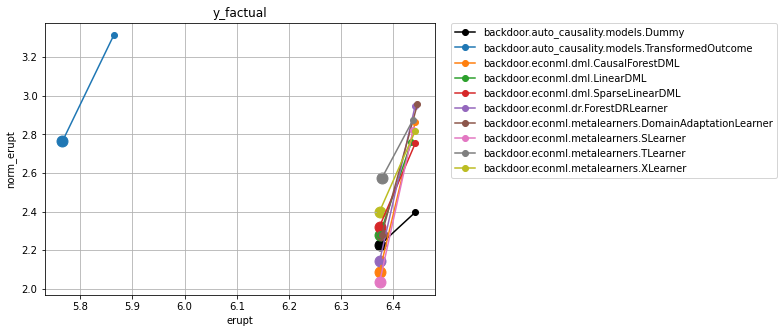

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ([matplotlib.colors.CSS4_COLORS['black']] +
    list(matplotlib.colors.TABLEAU_COLORS) + [
    matplotlib.colors.CSS4_COLORS['lime'],
    matplotlib.colors.CSS4_COLORS['yellow'],
    matplotlib.colors.CSS4_COLORS['pink']
])


plt.figure(figsize = (7,5))
plt.title(outcome)

m1 = "erupt"
m2 = "norm_erupt"

for (est, scr), col in zip(ac.scores.items(),colors):
    try:
        sc = [scr["scores"]['train'][m1], scr["scores"]['validation'][m1]]
        crv = [scr["scores"]['train'][m2], scr["scores"]['validation'][m2]]
        plt.plot(sc, crv, color=col, marker="o")
        plt.scatter(sc[1:],crv[1:], c=col, s=120 )
    except:
        pass
plt.xlabel(m1)
plt.ylabel(m2)

plt.legend(ac.scores.keys(),bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.grid()
plt.show()


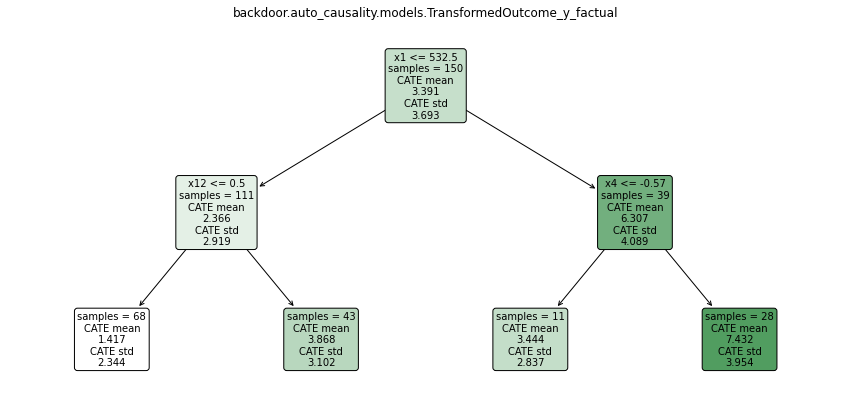

In [6]:
scr = ac.scores[ac.best_estimator]
intrp = scr["scores"]['validation']['intrp']
plt.figure(figsize=(15, 7))
try: 
    feature_names = intrp.feature_names
except:
    feature_names = features_X + [ w for w in features_W if w not in features_X]
intrp.plot(feature_names=intrp.feature_names, fontsize=10)
#         intrp.plot( fontsize=10)
plt.title(f"{ac.best_estimator}_{outcome}")
plt.show()


In [7]:
# TODO: add SHAP plots!
import matplotlib.pyplot as plt
import shap

# and now let's visualize feature importances!
from auto_causality.shap import shap_values

# Shapley values calculation can be slow so let's subsample
this_df = ac.test_df.sample(100)


scr = ac.scores[ac.best_estimator]
print(outcome, ac.best_estimator)
est = ac.model
shaps = shap_values(est, this_df)

plt.title(outcome + '_' + ac.best_estimator.split('.')[-1])
shap.summary_plot(shaps, this_df[est.estimator._effect_modifier_names])
plt.show()


y_factual backdoor.auto_causality.models.TransformedOutcome

'TransformedOutcome' object has no attribute 'shap_values'


AttributeError: 'TransformedOutcomeFitter' object has no attribute 'shap_values'